In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Simulation

In [2]:
coin = make_array('heads', 'tails')

In [3]:
np.random.choice(coin)

'heads'

In [4]:
np.random.choice(coin, 10)

array(['tails', 'tails', 'tails', 'tails', 'heads', 'heads', 'tails',
       'heads', 'tails', 'heads'],
      dtype='<U5')

In [5]:
sum(np.random.choice(coin, 10) == 'heads')

5

In [6]:
# Simulate one outcome

def heads_in_100_tosses():
    return sum(np.random.choice(coin, 100) == 'heads')

In [7]:
# Decide how many times you want to repeat the experiment

num_simulations = 10000

In [8]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_100_tosses())
    
outcomes

array([ 53.,  46.,  38., ...,  52.,  49.,  52.])

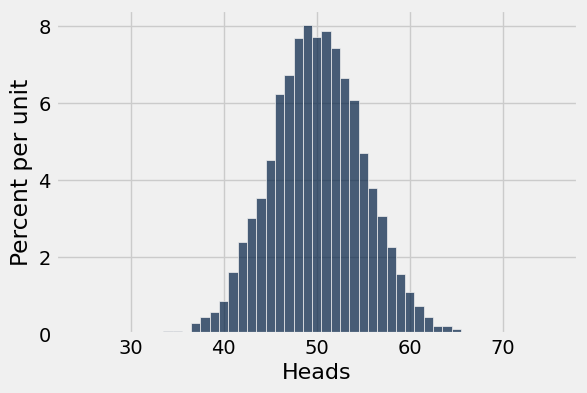

In [9]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(24.5, 76.5))

# Chance 

## Probability Question
- I have three cards: ace of hearts, king of diamonds, and queen of spades.
- I shuffle them and draw two cards at random without replacement.
- What is the chance that I get the Queen followed by the King?

**Answer**: 
|outcome   | first | second |
| :--| :--| :--|
|1 | ace   | king| 
|2 | ace   | queen |
|3 | king  | ace |
|4 | king  | queen|
|4 | queen | ace |
|6 | **queen** | **king** |

There are 6 possible outcomes: First round I had 3 different options, second round I had 2 different options. I.e. total possible outcomes:  $3*2$

The chance of getting Queen followed by King is 1/6.

**Multiplication rule:**

1. A K [Q] 
    - chance: 1/3
2. A [K]
    - chance: 1/2

In [10]:
cards = make_array('ace', 'king', 'queen')

In [11]:
np.random.choice(cards, 2, replace=False)

array(['ace', 'queen'],
      dtype='<U5')

---
back to slides

---

# Another Question
- I have three cards: ace of hearts, king of diamonds, and queen of spades.
- I shuffle them and draw two cards at random without replacement.
- What is the chance that one of the cards I draw is a King and the other is Queen?

**Answer**: 
|outcome   | first | second |
| :--| :--| :--|
|1 | ace   | king| 
|2 | ace   | queen |
|3 | king  | ace |
|4 | **king**  | **queen** |
|4 | queen | ace |
|6 | **queen** | **king** |

There are 6 possible outcomes: First round I had 3 different options, second round I had 2 different options. I.e. total possible outcomes:  $3*2$

The chance of getting a king and a queen is 
$2/6 = 1/6 + 1/6$

--- 
back to slides

---

# Discussion question
A population has 100 people, including Rick and Morty.
We sample two people at random without replacement.

1. P(both Rick and Morty are in the sample)
1. P(neither Rick nor Morty is in the sample)

P(both Rick and Morty are in the sample) <br/>
 = P(first Rick, then Morty) + P(first Morty, then Rick)  <br/>
 = (1/100) * (1/99)   +   (1/100) * (1/99)        <br/>
 = 2* (1/100) * (1/99) <br/>
 =  0.0002


P(neither Rick nor Morty is in the sample) <br/>
= (98/100) * (97/99) <br/>
=  0.9602


---
back to slides

---

# The Monty Hall Problem

In [12]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

In [13]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car' # Contestant wins if they switch door
    
    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car' # Contestant wins if they switch door
    
    if contestant_choice == 'car':
        monty_choice = np.random.choice(['first goat', 'second goat'])
        if monty_choice == 'first goat':
            remaining_choice = 'second goat' # Contestant looses if they switch door
        elif monty_choice == 'second goat':
            remaining_choice = 'first goat' # Contestant looses if they switch door        
        
    return [contestant_choice, monty_choice, remaining_choice]

In [14]:
monty_hall()

['first goat', 'second goat', 'car']

In [15]:
results = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    results.append(monty_hall())

In [16]:
results.show(3)

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car


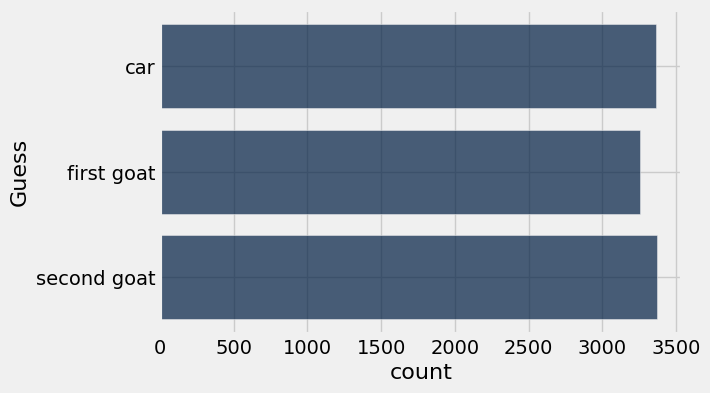

In [17]:
results.group('Guess').barh('Guess')

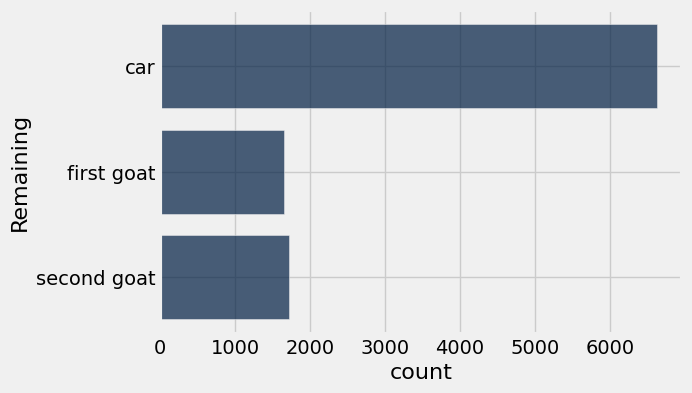

In [18]:
results.group('Remaining').barh('Remaining')